In [174]:
from figures import get_cmap, apply_colormap_to_img, label_image_by_ratio

from matplotlib import pyplot as plt
import numpy as np
import harpy
import spatialdata as sd
import spatialdata_plot
import stackview
from microfilm import microplot

In [175]:
plt.rcParams['figure.dpi'] = 300

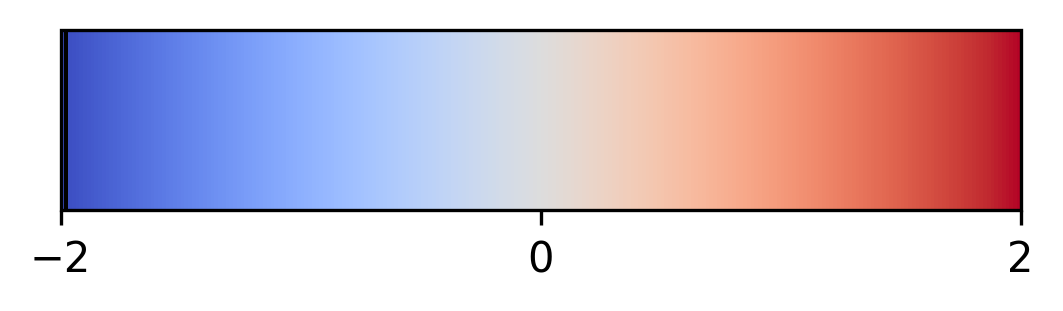

In [176]:
cmap = get_cmap()
a = np.array([[-2, 2]])
plt.figure(figsize=(4, 1))
img = plt.imshow(a, cmap=cmap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax, ticks=[-2, 0, 2],)
plt.savefig("colorbar.pdf")

In [177]:
def copy_labels(arr):
    # if 4 dimesions, return the last three and squeeze
    if arr.ndim > 2:
        arr = arr.squeeze()
    return arr



cellpose_kwargs = {
    'device': "cpu",
    'model_type': "cyto3",
    'channels': [2,1],
    'diameter': 30,
    'min_size': 10,
    'cellprob_threshold': 0,
    'flow_threshold': 0.6,
}

In [178]:
full_sdata = harpy.datasets.pixie_example()
full_sdata

2025-06-17 11:21:22,018 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov0'
2025-06-17 11:21:22,025 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov0'
2025-06-17 11:21:22,031 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov0'


/Users/benjaminr/.cache/huggingface/datasets/downloads/extracted/f7a07c6ab6491f45a667707cf16be9a057691dd4bb848cfb4640cfb699b85d95/post_clustering


2025-06-17 11:21:22,188 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov1'
2025-06-17 11:21:22,196 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov1'
2025-06-17 11:21:22,206 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov1'
2025-06-17 11:21:22,359 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov2'
2025-06-17 11:21:22,369 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov2'
2025-06-17 11:21:22,382 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov2'
2025-06-17 11:21:22,537 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov3'
2025-06-17 11:21:22,546 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov3'
2025-06-17 11:21:22,556 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov3'
2025-06-17 11:21:22,689 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov4'
20

SpatialData object
├── Images
│     ├── 'raw_image_fov0': DataArray[cyx] (22, 512, 512)
│     ├── 'raw_image_fov1': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov2': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov3': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov4': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov5': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov6': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov7': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov8': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov9': DataArray[cyx] (22, 1024, 1024)
│     └── 'raw_image_fov10': DataArray[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'label_nuclear_fov0': DataArray[yx] (512, 512)
│     ├── 'label_nuclear_fov1': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov2': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov3': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov4': DataArray[yx] (1024, 1024)
│     ├

In [179]:
sdata = sd.SpatialData()
c_subset = ['H3K27me3', 'CD45']
sdata['cells'] = sd.models.Image2DModel.parse(
    full_sdata['raw_image_fov0'].sel(c=c_subset), c_coords=c_subset
)
sdata['labels'] = full_sdata['label_whole_fov0'].copy()
sdata

SpatialData object
├── Images
│     └── 'cells': DataArray[cyx] (2, 512, 512)
└── Labels
      └── 'labels': DataArray[yx] (512, 512)
with coordinate systems:
    ▸ 'fov0', with elements:
        cells (Images), labels (Labels)

In [180]:
img = sdata["cells"].chunk(212).copy()
img

<xarray.DataArray 'image' (c: 2, y: 512, x: 512)> Size: 2MB
dask.array<rechunk-merge, shape=(2, 512, 512), dtype=float32, chunksize=(2, 212, 212), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U8 64B 'H3K27me3' 'CD45'
  * y        (y) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 508.5 509.5 510.5 511.5
  * x        (x) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 508.5 509.5 510.5 511.5
Attributes:
    transform:  {'fov0': Identity }

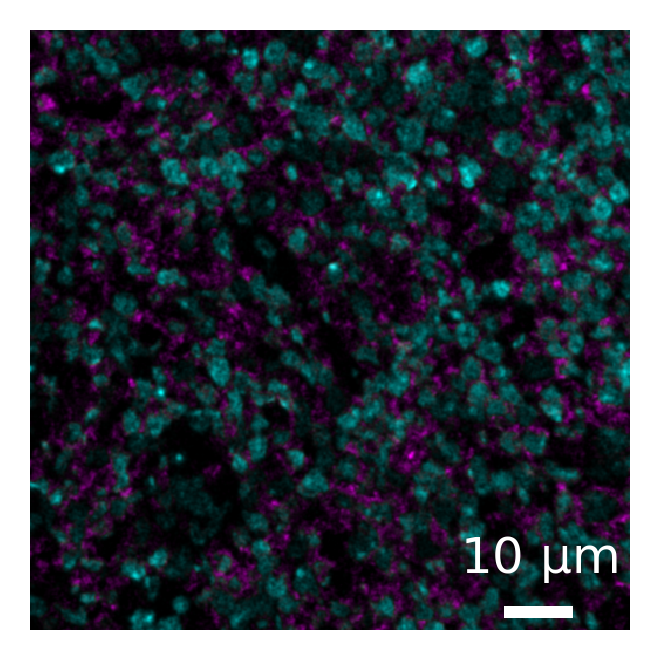

In [181]:
microim = microplot.microshow(images=img, unit='um', scalebar_unit_per_pix=0.17, scalebar_size_in_units=10, dpi=300, fig_scaling=2)

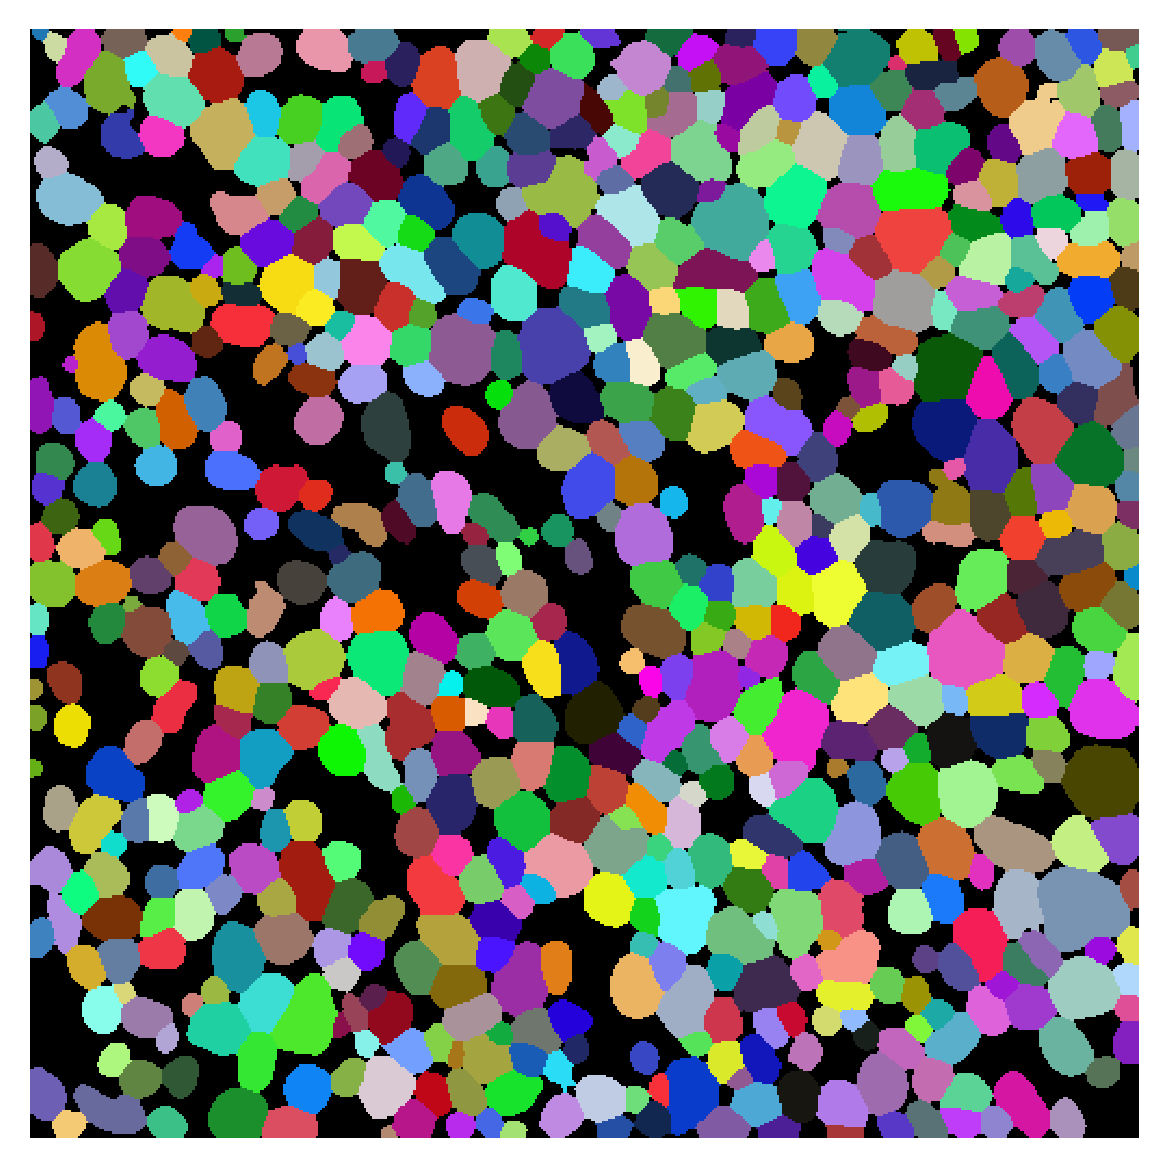

In [182]:
stackview.imshow(full_sdata['label_whole_fov0'].data)

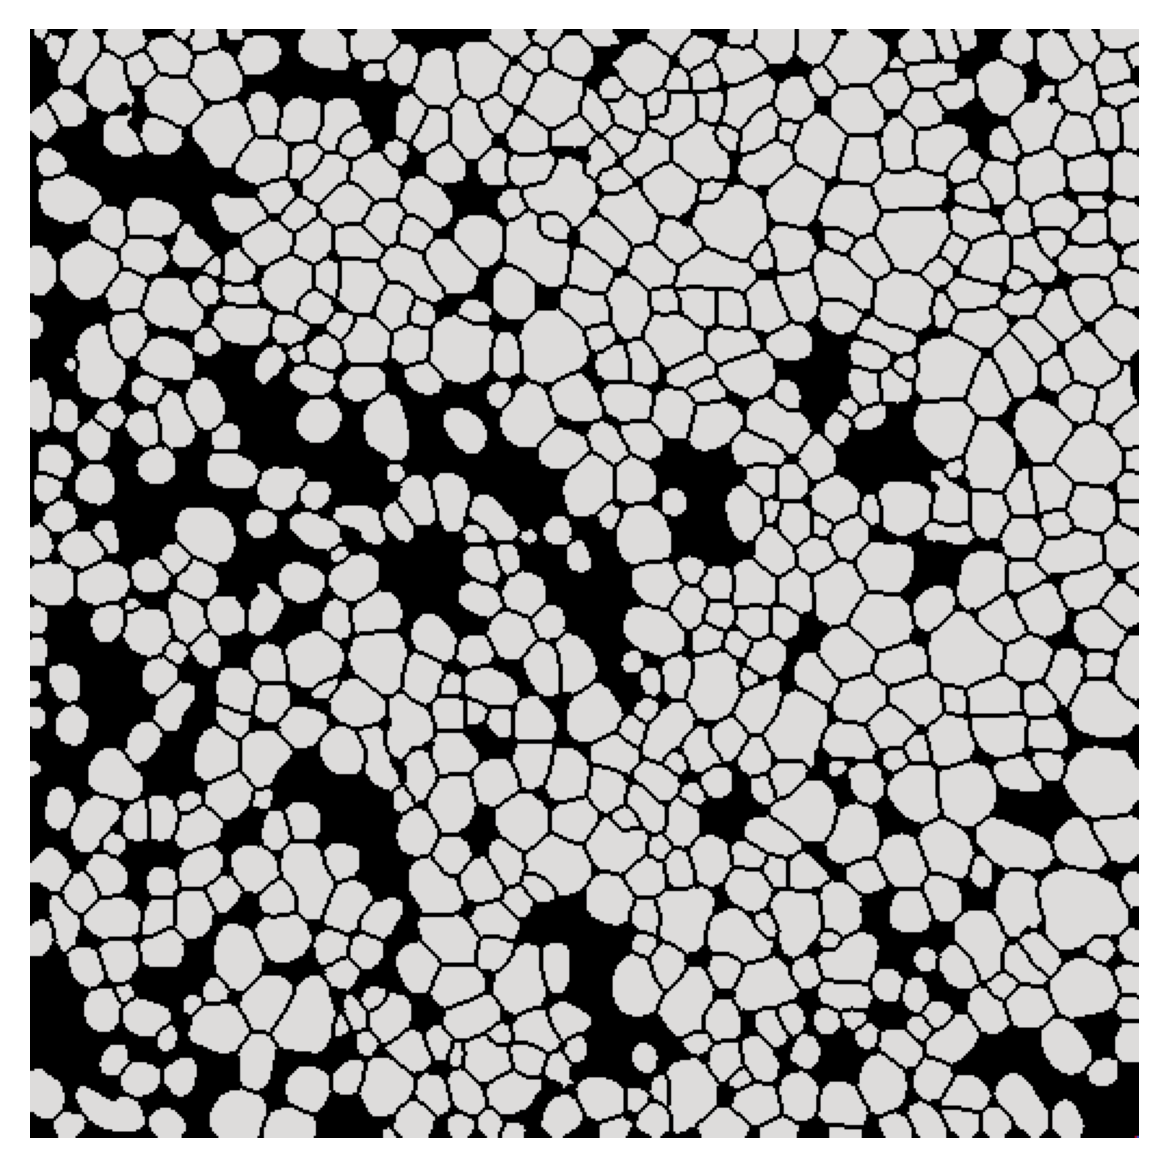

In [183]:
import dask.array as da

def plot_labels(result=None, labels=None, ax=None):
    if labels is None:
        labels = full_sdata['label_whole_fov0'].data.compute().copy()
    if result is None:
        result = full_sdata['label_whole_fov0'].data.compute().copy()
    # if result is xarray.DataArray, convert to numpy array
    if not isinstance(result, np.ndarray) and hasattr(result, 'data'):
        result = result.data
    if not isinstance(labels, np.ndarray) and hasattr(labels, 'data'):
        labels = labels.data
    if isinstance(result, da.Array):
        result = result.compute()
    if isinstance(labels, da.Array):
        labels = labels.compute()
    disp_labels = label_image_by_ratio(true_label=labels, pred_label=result, threshold=2) 
    disp_labels_final = apply_colormap_to_img(disp_labels)
    plt.imshow(disp_labels_final)
    plt.axis('off')

plot_labels()

## Examples without segmentation model

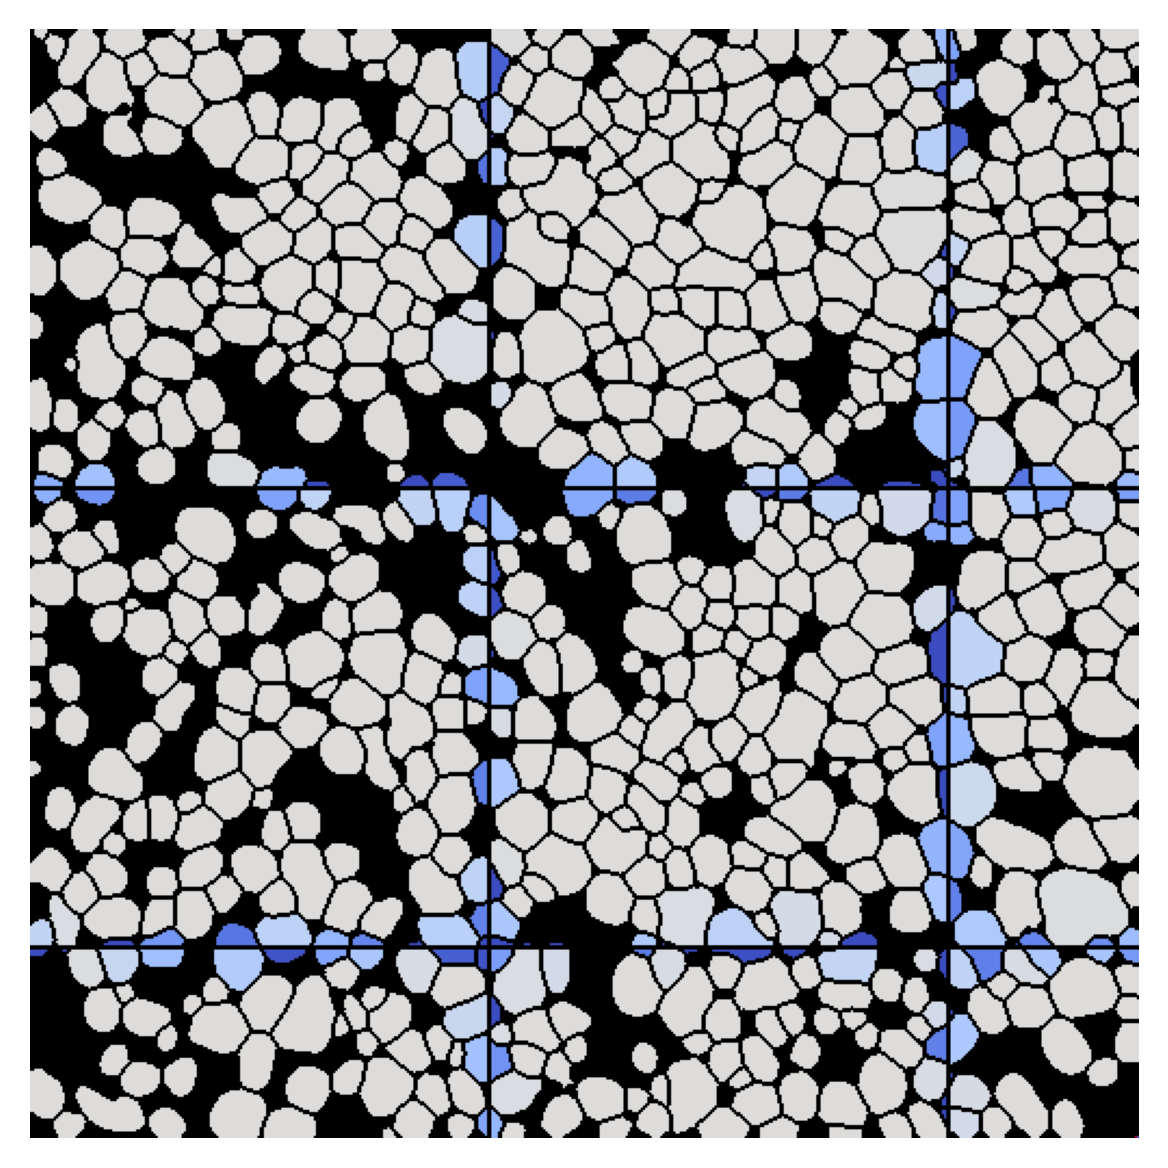

In [155]:
labels = full_sdata['label_whole_fov0'].copy()

results = sd.map_raster(labels.chunk(212), func=copy_labels, blockwise=True, depth=10, relabel=True)
# img_dask_label = results.data.compute()
plot_labels(results)

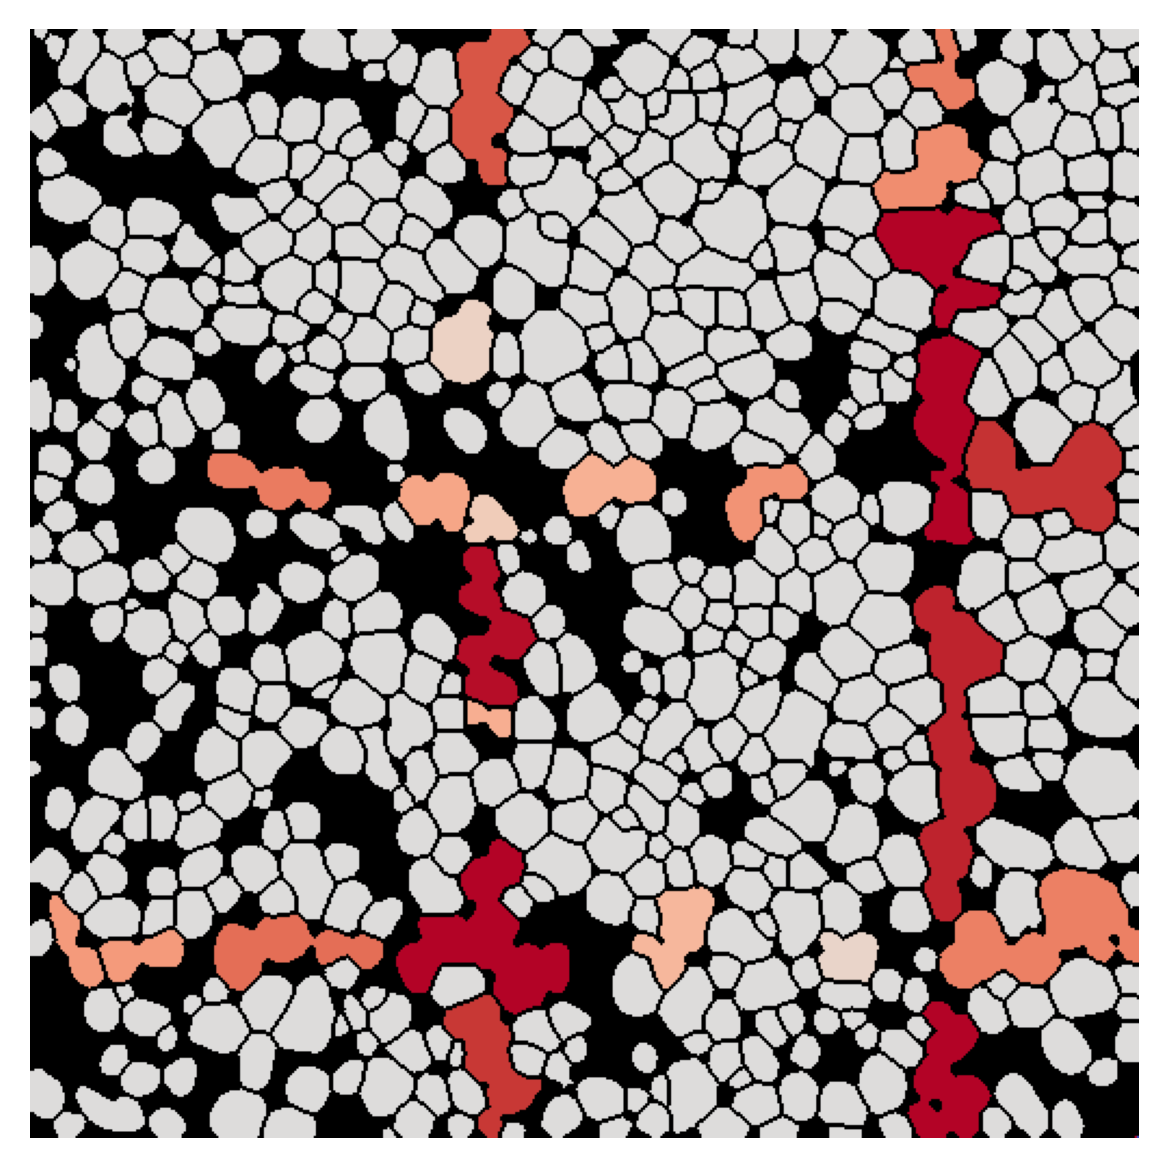

In [156]:
import squidpy

labels = full_sdata['label_whole_fov0'].copy()

ic = squidpy.im.ImageContainer(labels)
ic

result = squidpy.im.segment(
    img=ic,
    layer='image',
    method=copy_labels,
    chunks=212,
    copy=True,
)

plot_labels(result['segmented_custom'].squeeze())

## Harpy cellpose example with correct Harpy merging

StackViewNDArray([[[0.0076252 , 0.0167314 , 0.0243496 , ..., 0.08858868,
                    0.07731997, 0.06749719],
                   [0.00660778, 0.01690491, 0.02767651, ..., 0.07863893,
                    0.07640908, 0.07389927],
                   [0.00271314, 0.01034705, 0.02060137, ..., 0.06406275,
                    0.07068126, 0.07400459],
                   ...,
                   [0.        , 0.        , 0.00107439, ..., 0.        ,
                    0.        , 0.        ],
                   [0.        , 0.        , 0.0003394 , ..., 0.        ,
                    0.        , 0.        ],
                   [0.        , 0.        , 0.        , ..., 0.        ,
                    0.        , 0.        ]],

                  [[0.01158233, 0.01820506, 0.01917045, ..., 0.01154289,
                    0.00333891, 0.000927  ],
                   [0.00779073, 0.01290361, 0.01516519, ..., 0.0164803 ,
                    0.00715587, 0.0036177 ],
                   [0.00526639, 0.00729505, 0.00815942, ..., 0.02021179,
                    0.01199265, 0.00989413],
                   ...,
                   [0.        , 0.        , 0.        , ..., 0.00105758,
                    0.00032758, 0.        ],
                   [0.        , 0.        , 0.        , ..., 0.00174265,
                    0.00074921, 0.        ],
                   [0.        , 0.        , 0.        , ..., 0.00408248,
                    0.00278055, 0.00033115]]], dtype=float32)
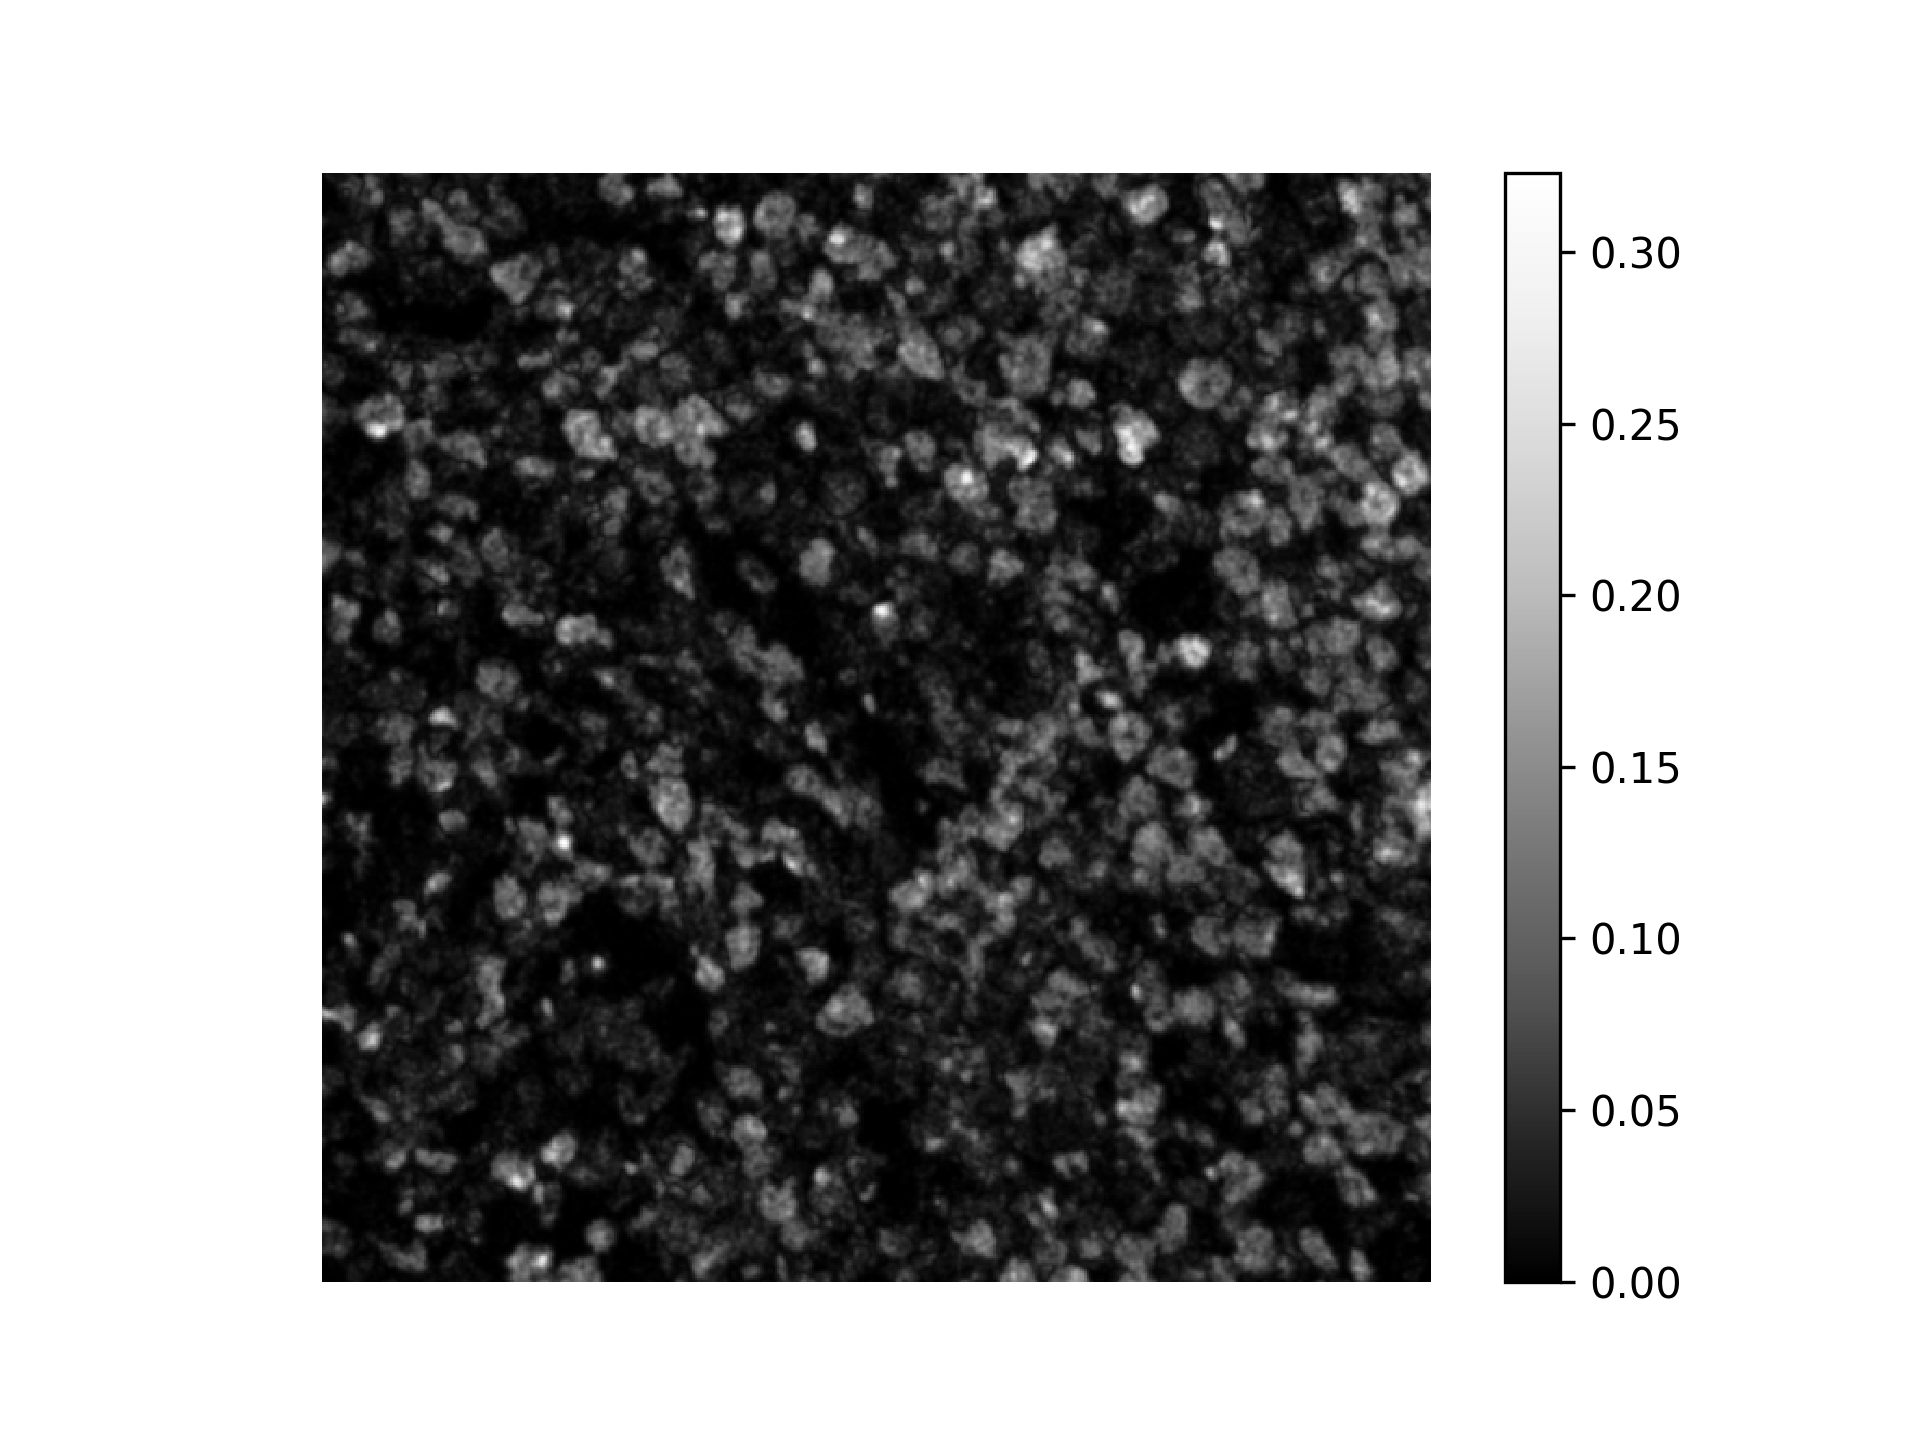
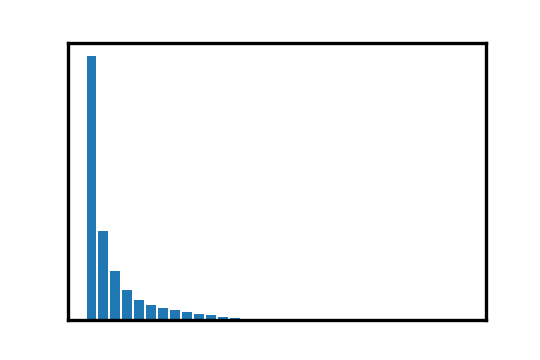

In [157]:
sdata = sd.SpatialData()
c_subset = ['H3K27me3', 'CD45']
sdata['cells'] = sd.models.Image2DModel.parse(
    full_sdata['raw_image_fov0'].sel(c=c_subset), c_coords=c_subset
)
sdata['labels'] = full_sdata['label_whole_fov0'].copy()
stackview.insight(sdata['cells'])

2025-06-17 11:08:06,633 - harpy.image.segmentation._segmentation - INFO - Linking labels across chunks.
2025-06-17 11:08:06,663 - harpy.image._manager - INFO - Writing results to layer 'masks_no_cleanup'


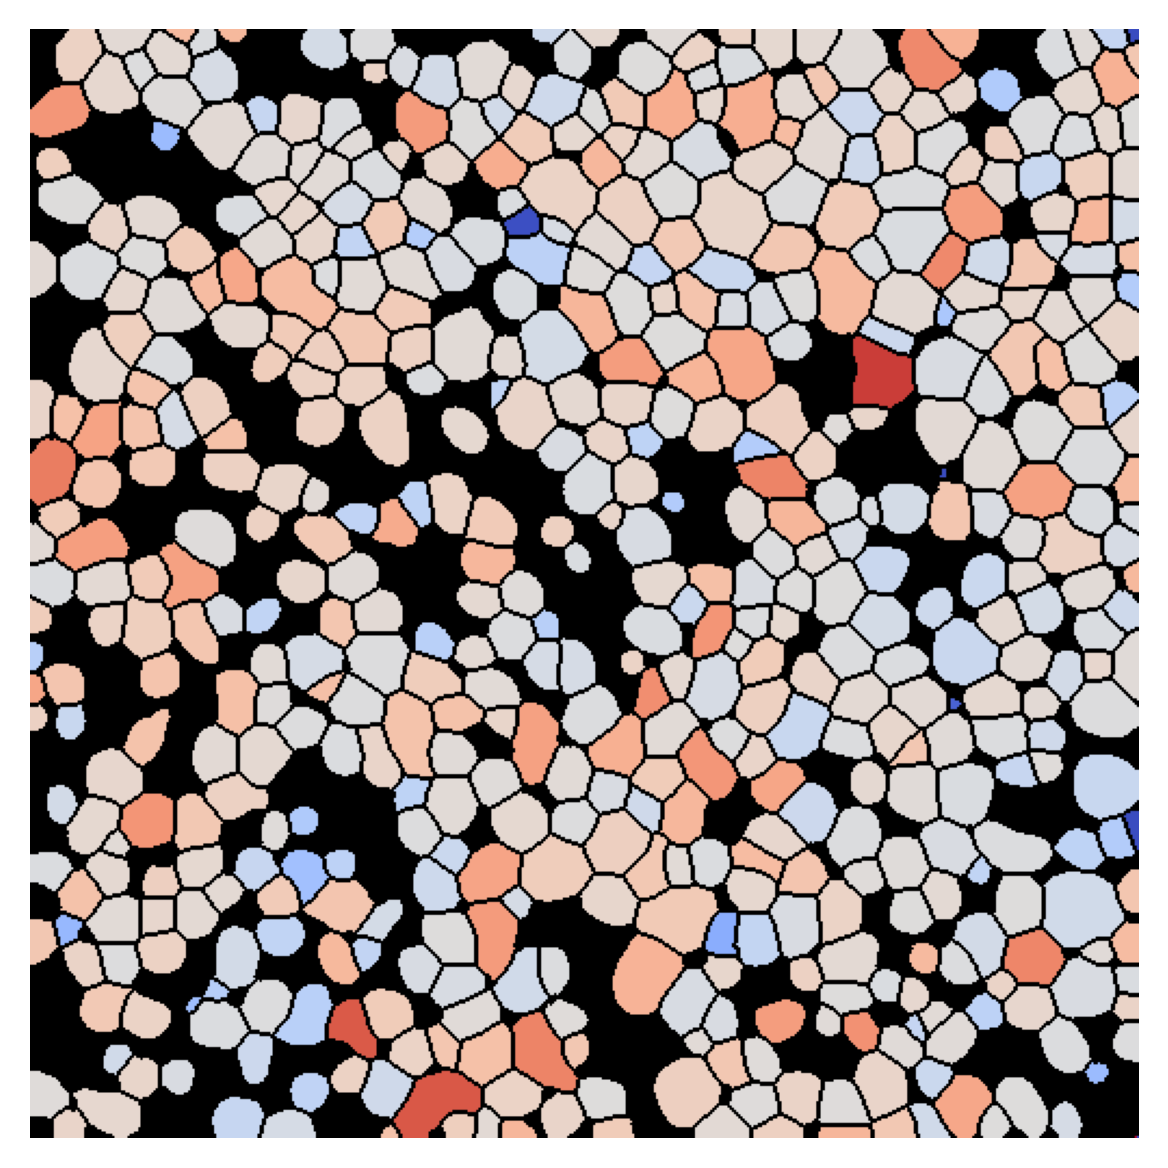

In [160]:
model = harpy.im.cellpose_callable
labels_layer = "masks_no_cleanup"
if labels_layer in sdata:
    del sdata[labels_layer]
sdata = harpy.im.segment(
    sdata,
    img_layer="cells",
    model=model,
    output_labels_layer=labels_layer,
    output_shapes_layer=None,
    overwrite=True,
    trim=False,
    chunks=212,
    depth=50,
    **cellpose_kwargs,
)
result = sdata[labels_layer]
plot_labels(result)

## Harpy cellpose example with incorrect Squidpy merging

2025-06-17 11:08:32,773 - harpy.image.segmentation._segmentation - INFO - Linking labels across chunks.
2025-06-17 11:08:32,797 - harpy.image._manager - INFO - Writing results to layer 'masks_no_cleanup'


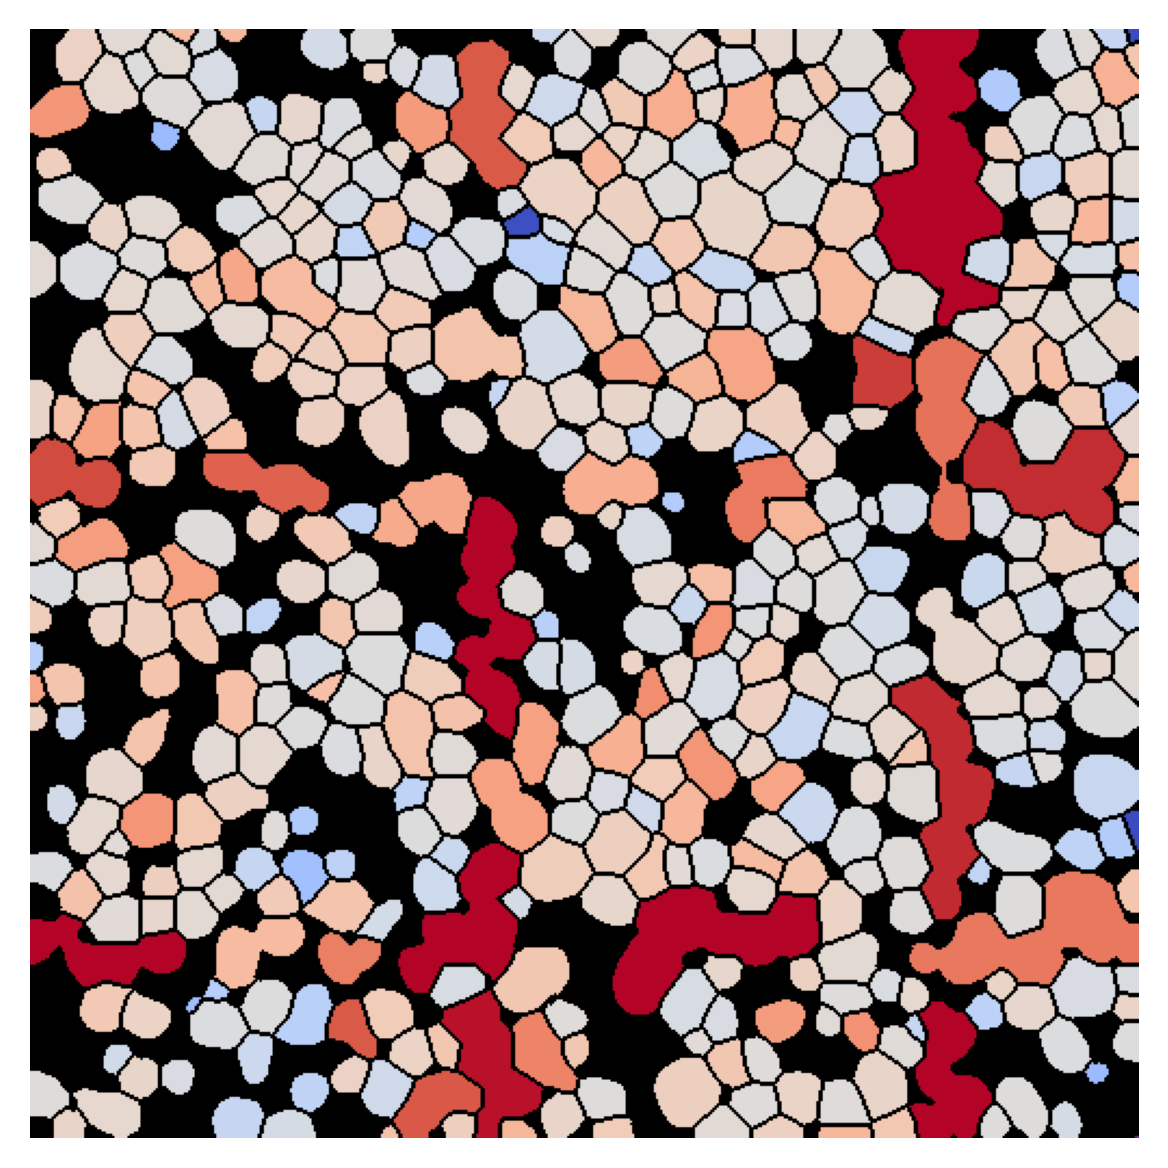

In [161]:
model = harpy.im.cellpose_callable
labels_layer = "masks_no_cleanup"
if labels_layer in sdata:
    del sdata[labels_layer]
sdata = harpy.im.segment(
    sdata,
    img_layer="cells",
    model=model,
    output_labels_layer=labels_layer,
    output_shapes_layer=None,
    overwrite=True,
    trim=True,
    chunks=212,
    depth=50,
    **cellpose_kwargs,
)
result = sdata[labels_layer]
plot_labels(result)

## Squidpy example with incorrect merging

StackViewNDArray([[[0.0076252 , 0.0167314 , 0.0243496 , ..., 0.08858868,
                    0.07731997, 0.06749719],
                   [0.00660778, 0.01690491, 0.02767651, ..., 0.07863893,
                    0.07640908, 0.07389927],
                   [0.00271314, 0.01034705, 0.02060137, ..., 0.06406275,
                    0.07068126, 0.07400459],
                   ...,
                   [0.        , 0.        , 0.00107439, ..., 0.        ,
                    0.        , 0.        ],
                   [0.        , 0.        , 0.0003394 , ..., 0.        ,
                    0.        , 0.        ],
                   [0.        , 0.        , 0.        , ..., 0.        ,
                    0.        , 0.        ]],

                  [[0.01158233, 0.01820506, 0.01917045, ..., 0.01154289,
                    0.00333891, 0.000927  ],
                   [0.00779073, 0.01290361, 0.01516519, ..., 0.0164803 ,
                    0.00715587, 0.0036177 ],
                   [0.00526639, 0.00729505, 0.00815942, ..., 0.02021179,
                    0.01199265, 0.00989413],
                   ...,
                   [0.        , 0.        , 0.        , ..., 0.00105758,
                    0.00032758, 0.        ],
                   [0.        , 0.        , 0.        , ..., 0.00174265,
                    0.00074921, 0.        ],
                   [0.        , 0.        , 0.        , ..., 0.00408248,
                    0.00278055, 0.00033115]]], dtype=float32)
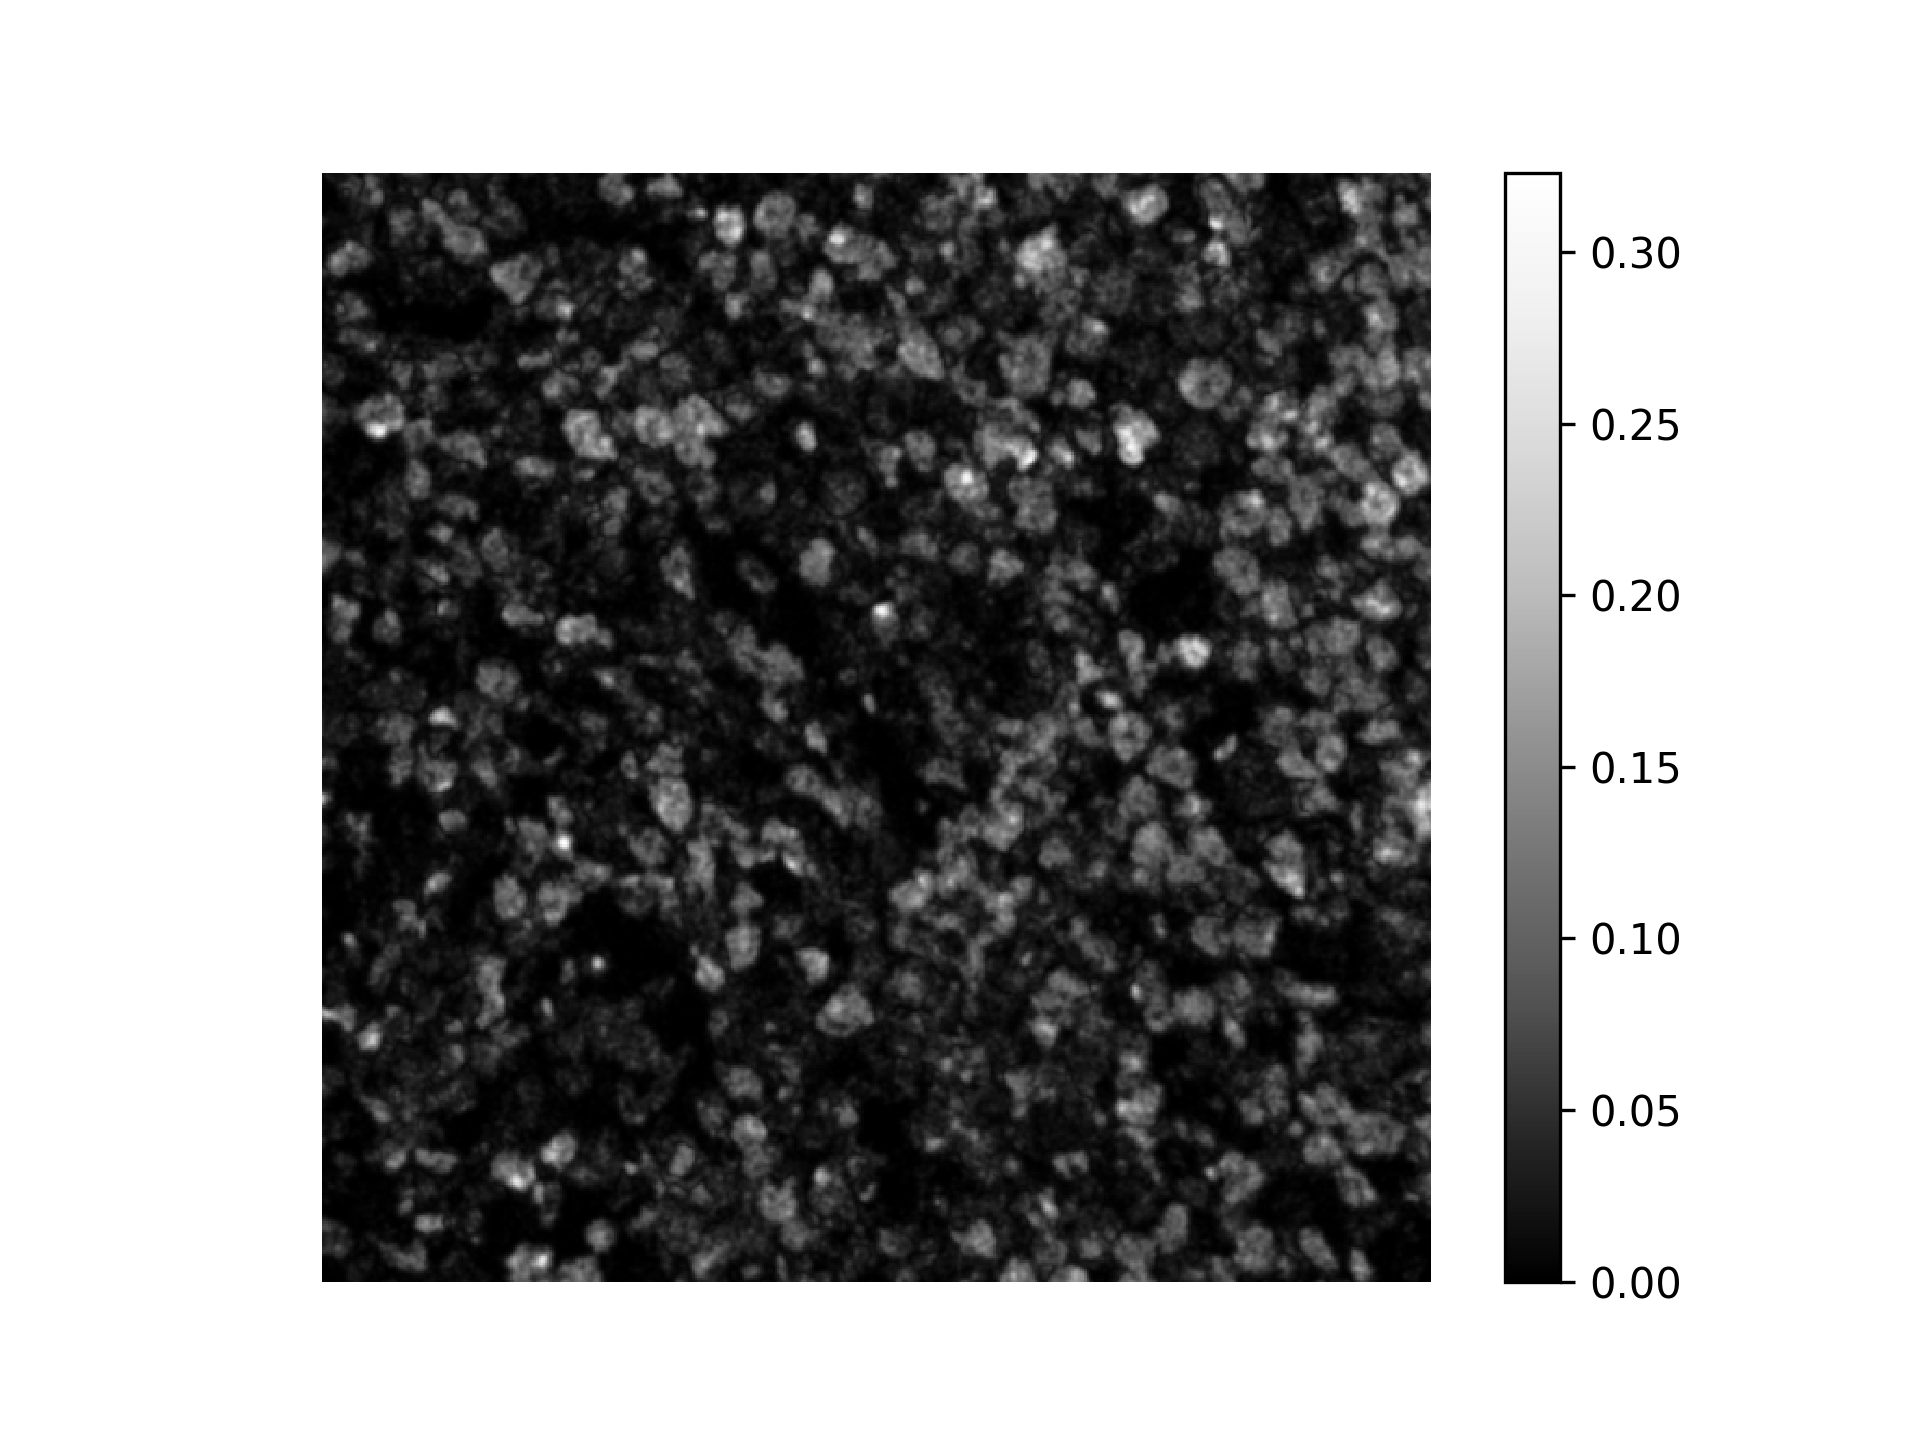
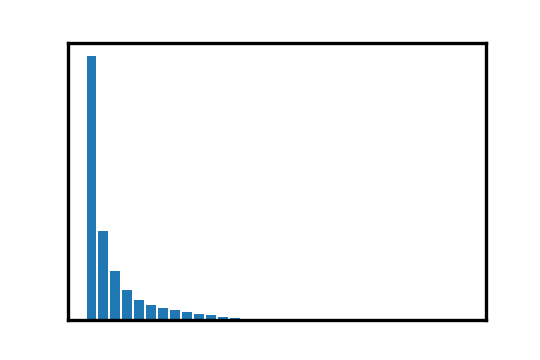

In [162]:
sdata = sd.SpatialData()
c_subset = ['H3K27me3', 'CD45']
sdata['cells'] = sd.models.Image2DModel.parse(
    full_sdata['raw_image_fov0'].sel(c=c_subset), c_coords=c_subset
)
sdata['labels'] = full_sdata['label_whole_fov0'].copy()
stackview.insight(sdata['cells'])

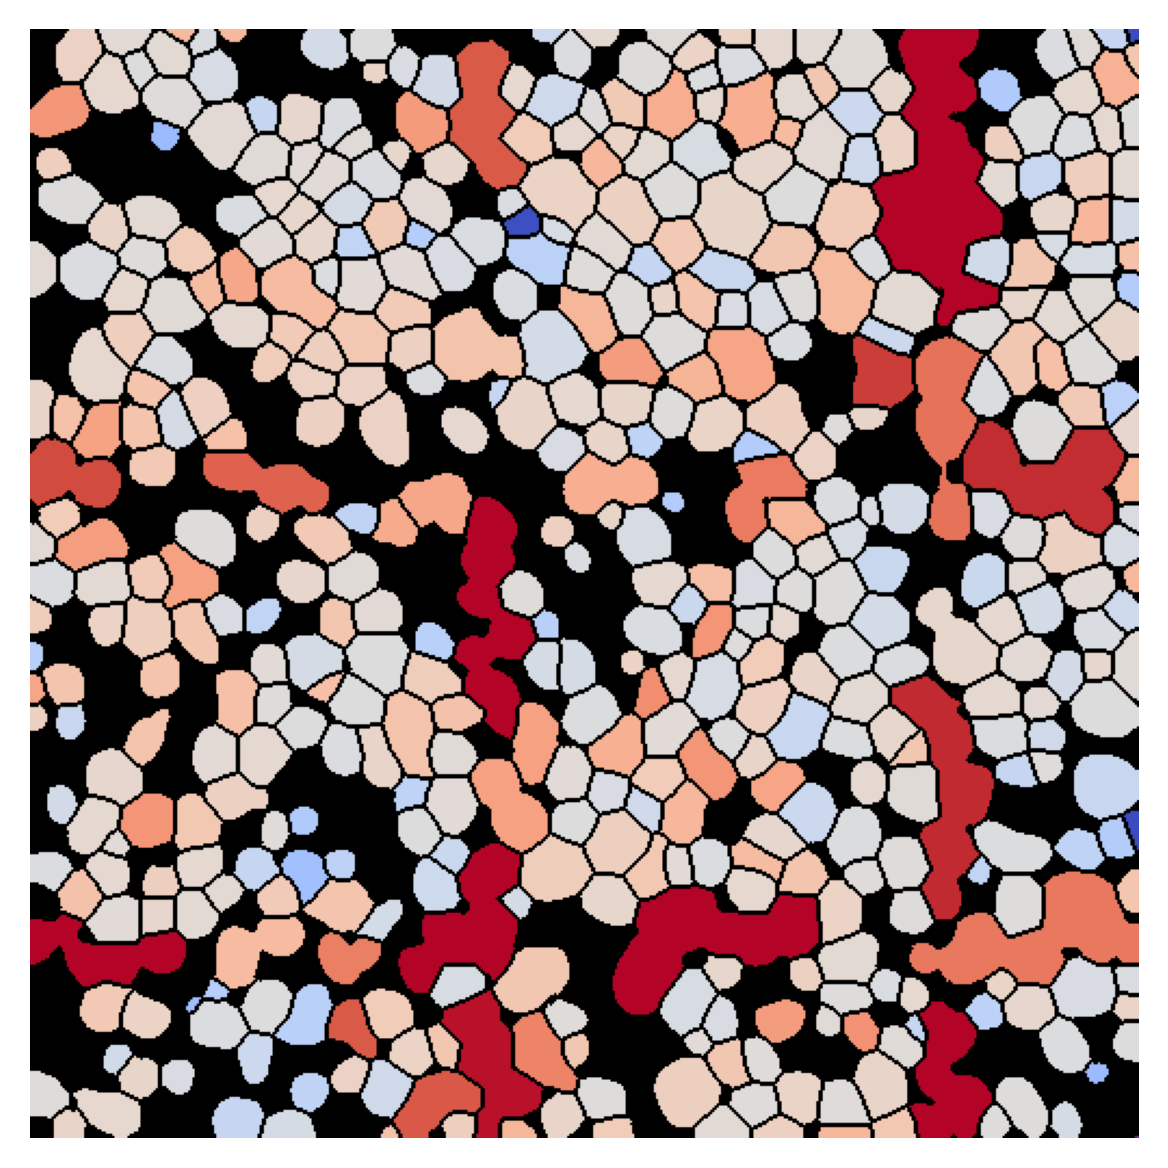

In [163]:
import squidpy
import dask.array as da

ic = squidpy.im.ImageContainer(sdata["cells"].chunk(212).data)
ic

# :class:`numpy.ndarray` ``(height, width, channels)`` **->** :class:`numpy.ndarray` ``(height, width[, 1])``.
#  The segmentation must be of :class:`numpy.uint32` type, where 0 marks background.
def cellpose(img, **kwargs):

    # Ensure the image is in the correct format for Cellpose, add the z dimension if necessary
    if img.ndim == 3:
        img = da.expand_dims(img, axis=0)
    # error: TypeError: only integer scalar arrays can be converted to a scalar index

    # Dimensions should follow the format (z,y,x,c)
    arr = harpy.im.cellpose_callable(
        img,
        **kwargs,
    )
    # Remove the z dimension if it was added
    if arr.ndim == 4:
        arr = arr[0, :, :, 0]
    return arr

result = squidpy.im.segment(
    img=ic,
    layer='image',
    method=cellpose,
    chunks=(212, 212, 2),
    channel=None,
    copy=True,
    depth={0: 50, 1: 50},
    **cellpose_kwargs,
)
result = result['segmented_custom'].data.squeeze()
plot_labels(result=result)

In [104]:
t_img = img.transpose('y', 'x', 'c')
t_img

<xarray.DataArray 'image' (y: 512, x: 512, c: 2)> Size: 2MB
dask.array<transpose, shape=(512, 512, 2), dtype=float32, chunksize=(212, 212, 2), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U8 64B 'H3K27me3' 'CD45'
  * y        (y) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 508.5 509.5 510.5 511.5
  * x        (x) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 508.5 509.5 510.5 511.5
Attributes:
    transform:  {'fov0': Identity }

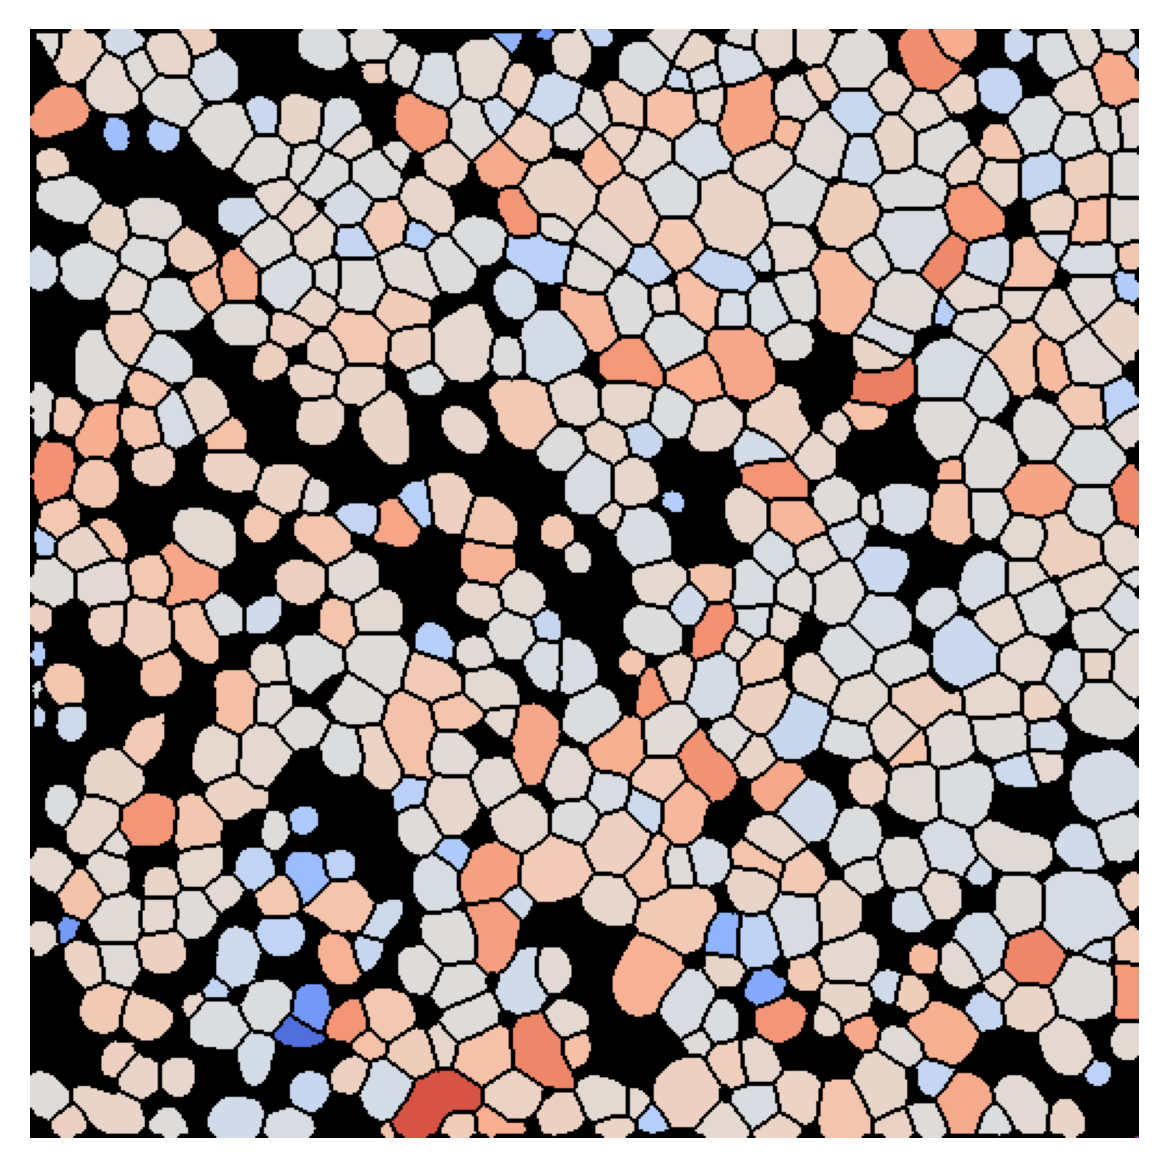

In [ ]:
r = cellpose(t_img.data,
    **cellpose_kwargs,
)
plot_labels(r)

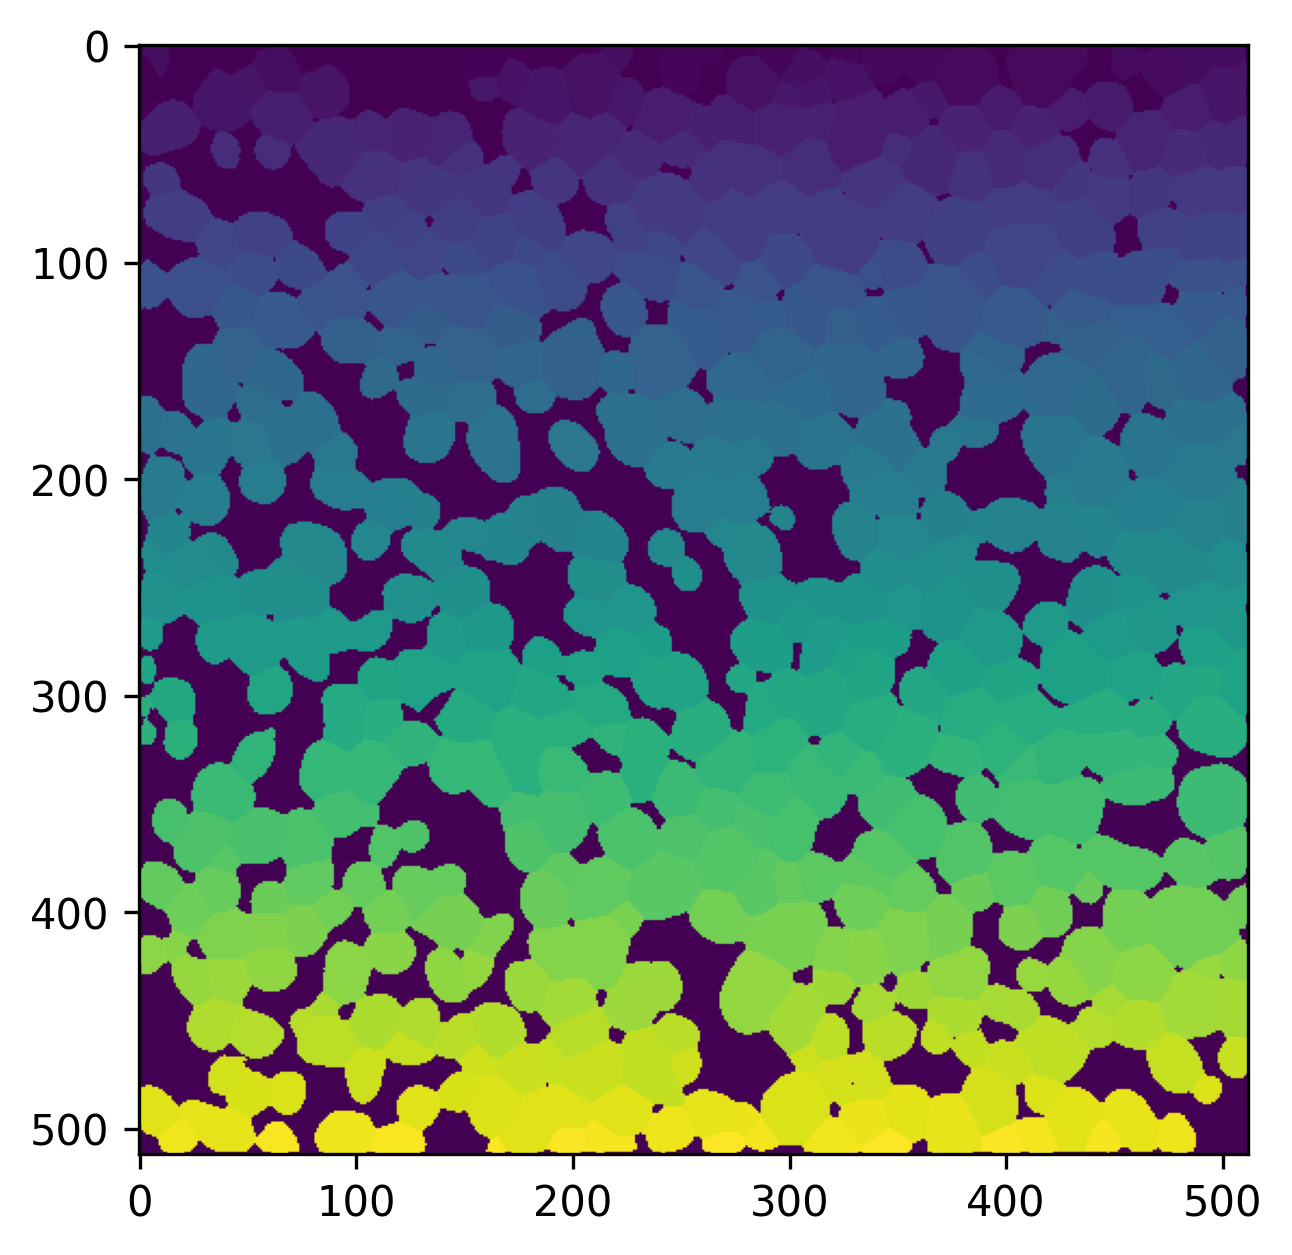

In [119]:
plt.imshow(r)